In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import datetime

In [6]:
path='D:/plots_result_data/DATA/TLP_Disdrometer/'
dsd_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith((".txt"))]

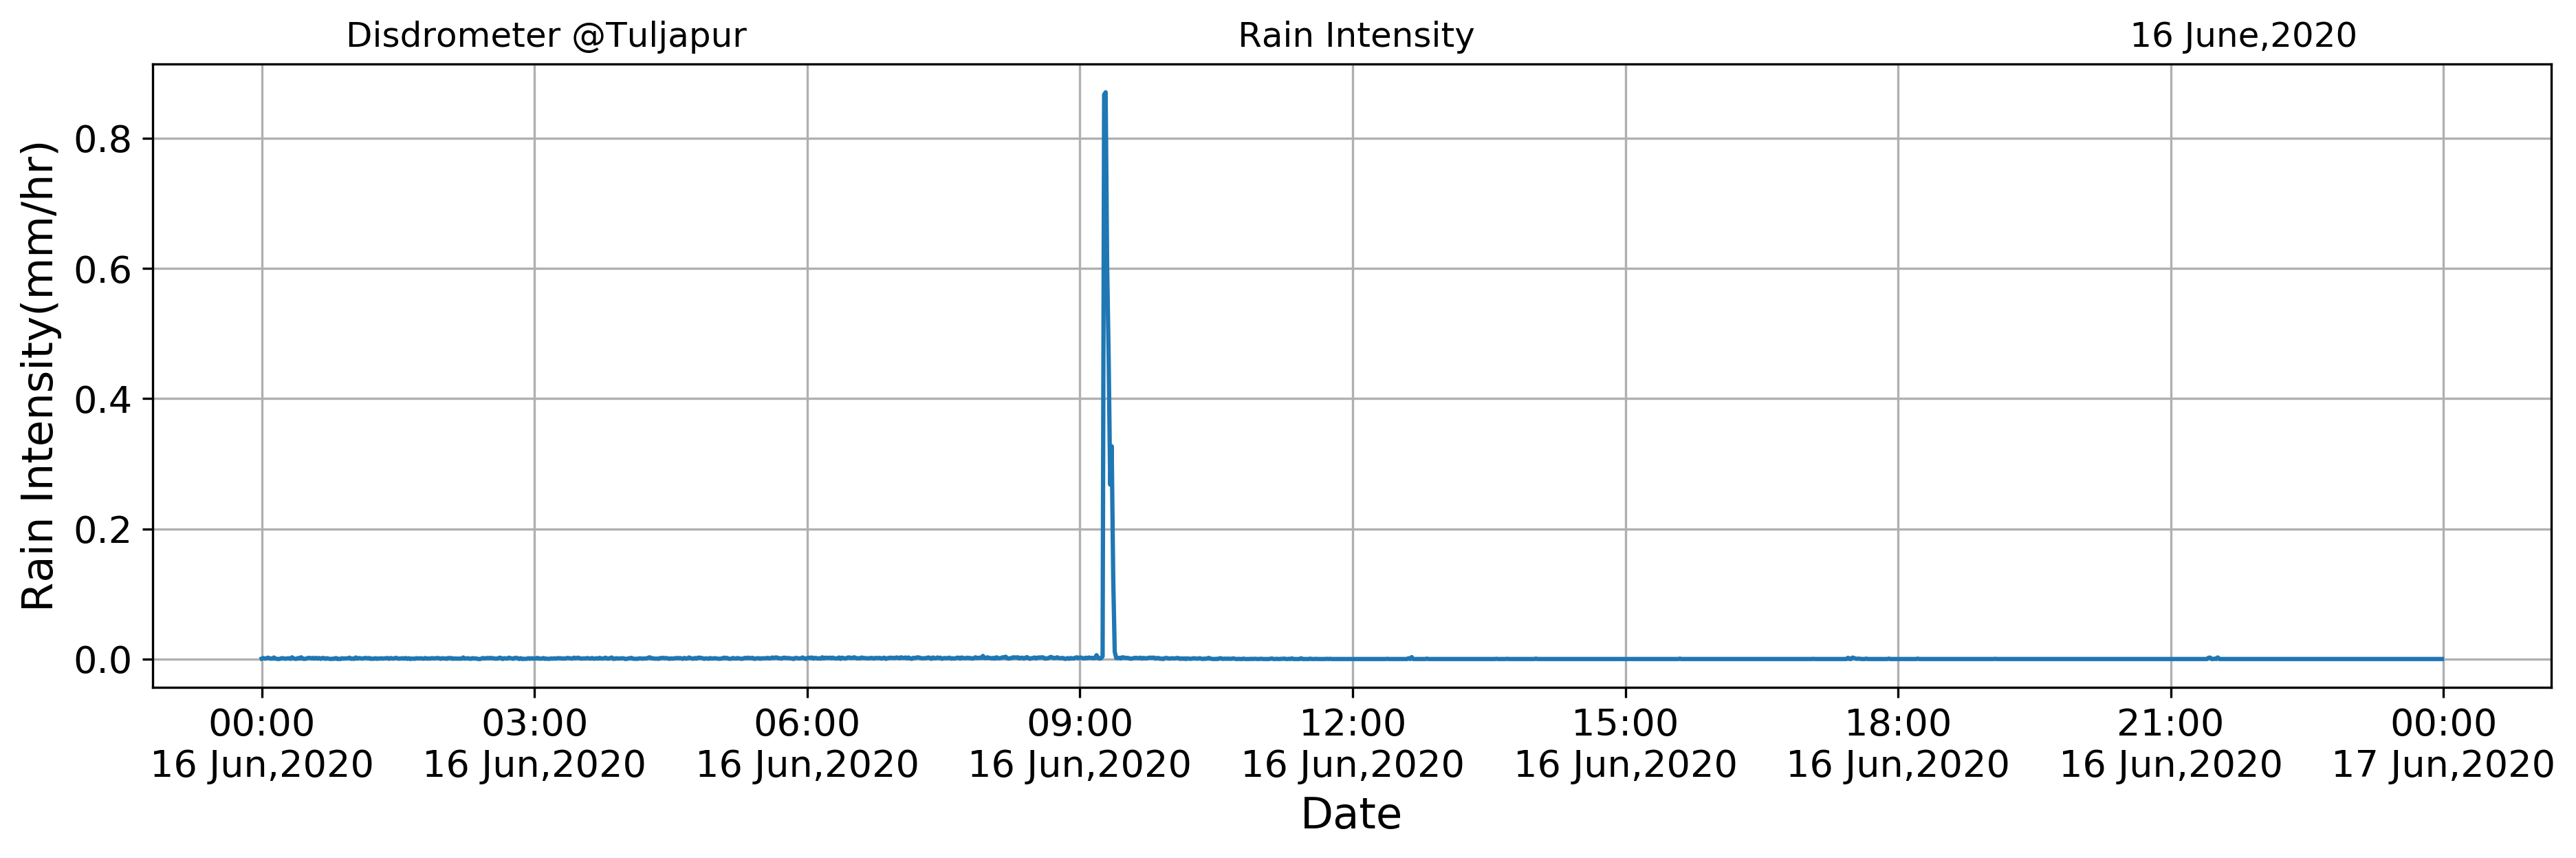

In [15]:

import matplotlib.dates as mdates
date=[];rain_intensity=[];rain_acc=[]
for i in dsd_files:
    a=pd.read_csv(i,sep='\t',usecols = ['YYYY-MM-DD', 'hh:mm:ss','RI [mm/h]', 'RA [mm]','RAT [mm]'])
    date.extend((a["YYYY-MM-DD"]+' '+a['hh:mm:ss']).astype('datetime64[ns]'))
    rain_intensity.extend(a['RI [mm/h]'])
disdro_data=pd.DataFrame({'Date':date,'RI (mm/hr)':rain_intensity})
disdro_data=disdro_data[(disdro_data['Date']>=datetime.datetime(2020,6,16,0,0,0))&
                        (disdro_data['Date']<=datetime.datetime(2020,6,16,23,59,59))]

x='   '
plt.figure(figsize=[15,4],dpi=300)
plt.plot(disdro_data['Date'],disdro_data['RI (mm/hr)'])
plt.xlabel("Date",fontsize=15);plt.ylabel('Rain Intensity(mm/hr)',fontsize=15)
plt.xticks(fontsize=13);plt.yticks(fontsize=13)
plt.title("Disdrometer @Tuljapur"+x*15+'Rain Intensity'+x*20+'16 June,2020')
# plt.xlim(date)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d %b,%Y'))
plt.grid()
plt.savefig('D:/plots_result_data/PLOTS/TLP_dsd/6June2020.png',dpi=300,bbox_inches='tight')
plt.show()